Question 1: Which Linear Regression training algorithm can you use if you have a training
set with millions of features?

Answer- We have to use the Gradient Descent (GD) approach rather than "closed form" approach if there is a training set with millions of features. Within the GD approaches, Stochastic GD and Mini-batch GD are more useful on large datasets. Batch GD approach should only be used if the training set fits in memory.

Question 2: Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

Answer- Gradient Descent approaches need scaling before training the data. Gradient Descent on unscaled data takes a larger time to converge global minimum. Also, the regularized models may converge into local minimum without scaling. Only the Normal equation or SVD approach can work without scaling the features.

Question 3: Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

Answer- The cost function for Gradient Descent on Logistic Regression is convex. So if the learning rate is not too large and enough time is given, then the global minimum must be achieved.

Question 4: Do all Gradient Descent algorithms lead to the same model, provided you let them run long enough?

Answer- Although all Gradient Descent algorithms lead to the almost same model if they are run long enough, there is always a small difference present between them. Like, the Batch Gradient Descent algorithm stops at the exact global minimum whereas the Stochastic Gradient Descent and Mini Batch Gradient Descent algorithms bounce back and forth near the global minimum.

Question 5: Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

Answer- If the training error and the validation error go up simultaneously at every epoch, then the problem should be the learning rate. The learning rate should be reduced in this case. But if the training error doesn't go up, then the model should be overfitting. In such case, the training should be stopped and the algorithm should be modified (like, applying regularization or reduce the degree) to neglect overfitting.

Question 6: Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

Answer- As the Mini-batch Gradient Descent goes up and down near the global optimum, so there is no guarantee that the optimum result has already been reached if the validation error goes up. So, the better idea is to look up closely to the model during the run time, and then decide the best model.

Question 7: Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

Answer- The fastest algorithm to reach the vicinity of the optimal solution is Stochastic Gradient Descent. Although the result of Stochastic Gradient Descent is nearby the global minimum, the result won’t be as accurate as Batch Gradient Descent.

If enough time is given, the Batch Gradient Descent will actually converge to the global minimum.

Gradually reducing the learning rate will converge Stochastic GD and Mini-Batch GD to the global optimum.


Question 8: Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

Answer- If there is a large gap between training and validation error during Polynomial regression, then the model seems to be working significantly well on the training data. It is the typical situation of overfitting the data. The ways to solve this:

1) Using much larger training set
2) Using less polynomial degree regression
3) Using regularization


Question 9: Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

Answer- If the training error and the validation error are almost equal and fairly high, then the model is likely to be underfitting the data. This situation is considered as high bias. The regularization hyperparameter α should be reduced for getting rid of this problem.


Question 10: Why would you want to use:
a. Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?
b. Lasso instead of Ridge Regression?
c. Elastic Net instead of Lasso?

Answer- a) It is always preferable to have atleast small amount of regularization than plain Linear Regression.

b) If there are only few features in the training data which are useful, then we should use the Lasso Regression instead of Ridge Regression. The Lasso Regression reduces the useless features’ weight to zero.

c) Elastic Net is preferable than Lasso Regression when the number of features are greater than the training instances or when several features are strongly correlated.


Question 11: Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

Answer- For classifying pictures as outdoor/indoor and daytime/nighttime, since these are not exclusive classes (i.e., all four combinations are possible)- so training two Logistic Regression classifiers would be better idea.


Question 12: Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

In [4]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [6]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [7]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [8]:
np.random.seed(2042)

In [9]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [10]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [11]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [13]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [14]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [16]:
eta = 0.01
n_iterations = 4001
m = len(X_train)
epsilon = 1e-6

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 6.087211275951611
500 0.7495936569962034
1000 0.6335850335232953
1500 0.5627793827301495
2000 0.5154202979259186
2500 0.4811595201282683
3000 0.45483179363126053
3500 0.4336603592890191
4000 0.41604200866538626


In [17]:
Theta

array([[ 3.3522608 ,  0.09154784, -1.65188199],
       [ 0.40572359,  1.07613471,  0.72218252],
       [-0.74049555,  1.17332136,  3.40425707]])

In [18]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [22]:
eta = 0.1
n_iterations = 4001
m = len(X_train)
epsilon = 1e-6
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.314078450119216
500 0.537893295452738
1000 0.5046559988072434
1500 0.49505253678279293
2000 0.49144172465553926
2500 0.4899597633060816
3000 0.4893246879777584
3500 0.48904576278061207
4000 0.4889214110875485


In [23]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [24]:
eta = 0.1 
n_iterations = 4001
m = len(X_train)
epsilon = 1e-6
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 1.458647200088655
500 0.5603793959560823
1000 0.5401141744289023
1500 0.5345848449904671
2000 0.5329265210556016
2500 0.5325538113356761
2631 0.5325433708039297
2632 0.5325433716455712 early stopping!


In [25]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

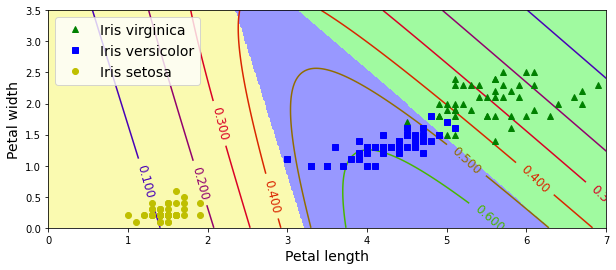

In [26]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [27]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333